# Тестовое задание

В папке с заданием два датасета - data_orders - содержит выборку данных по заказам клиентов и включает такие колонки как:
* order_datetime -  время заказа
* order_gk - номер заказа
* order_status_key - статус (4 - отменен клиентом, 9 - отменен системой (reject))
* is_courier_assigned_key - был ли назначен курьер
* cancellations_time_in_seconds - сколько секунд прошло до отмены

data_offers - содержит пары номер заказа - ID оффера, который был предложен курьеру по данному заказу.


В момент когда клиент нажимает на кнопку "Заказать" в приложении, система матчинга подыскивает наиболее релевантых курьеров и предлагаем им заказ. В задании предлагается исследовать некоторые метрики неудачных заказов

Задание является проверочным и не имеет ничего общего с реальной работой курьеров

**0.** Подготовка данных, проверка выбросов, аномалий

In [1]:
## CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#открываем файл data_orders и смотрим св-ва датасета
#опишите основные статистики датасета и его особенности
#df_orders = pd.read_csv('data_orders.csv')
#далее ваш код

In [3]:
import requests
from io import StringIO

In [4]:
url='https://drive.google.com/file/d/1xXd8y5efJoYBb1nsJA05zzpCldmdr1JE/view?usp=sharing'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df_orders = pd.read_csv(csv_raw)

In [5]:
df_orders

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
0,2020-07-22 18:08:07,3000583041974,4,1,198.0
1,2020-07-22 20:57:32,3000583116437,4,0,128.0
2,2020-07-22 12:07:50,3000582891479,4,1,46.0
3,2020-07-22 13:50:20,3000582941169,4,1,62.0
4,2020-07-22 21:24:45,3000583140877,9,0,NaN
...,...,...,...,...,...
10711,2020-07-22 13:11:35,3000599186906,4,0,36.0
10712,2020-07-22 13:13:55,3000599186962,4,0,4.0
10713,2020-07-22 13:17:21,3000599187034,4,1,34.0
10714,2020-07-22 13:16:28,3000599187024,4,0,6.0


In [6]:
df_orders.isna().sum() #почти для трети заказов есть пробелы во времени до отмены.
#за исключением колонки cancellations_time_in_seconds, пробелов в данных нет.

order_datetime                      0
order_gk                            0
order_status_key                    0
is_courier_assigned_key             0
cancellations_time_in_seconds    3409
dtype: int64

In [7]:
df_orders.nunique() 
#для 10716 заказов только 772 уникальных значений времени до отмены. Запомним. Возможно пригодится.

order_datetime                    9921
order_gk                         10716
order_status_key                     2
is_courier_assigned_key              2
cancellations_time_in_seconds      772
dtype: int64

In [8]:
df_orders.dtypes #посмотрим на типы данных

order_datetime                    object
order_gk                           int64
order_status_key                   int64
is_courier_assigned_key            int64
cancellations_time_in_seconds    float64
dtype: object

In [9]:
df_orders.order_datetime = pd.to_datetime(df_orders.order_datetime)

In [10]:
df_orders.cancellations_time_in_seconds.describe()

count    7307.000000
mean      157.892021
std       213.366963
min         3.000000
25%        45.000000
50%        98.000000
75%       187.500000
max      4303.000000
Name: cancellations_time_in_seconds, dtype: float64

(array([6.766e+03, 4.260e+02, 8.400e+01, 1.800e+01, 6.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([3.000e+00, 4.330e+02, 8.630e+02, 1.293e+03, 1.723e+03, 2.153e+03,
        2.583e+03, 3.013e+03, 3.443e+03, 3.873e+03, 4.303e+03]),
 <a list of 10 Patch objects>)

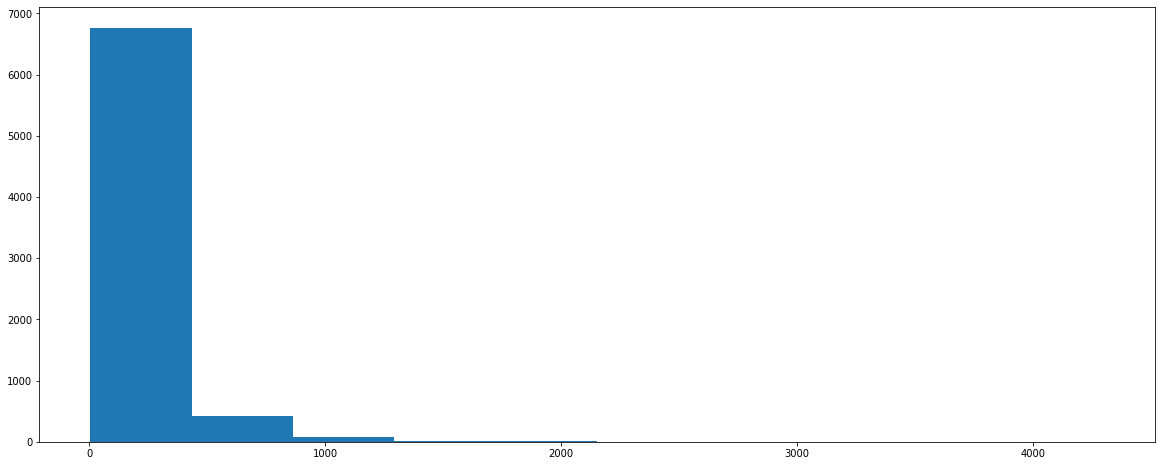

In [11]:
plt.figure(figsize=(20, 8))
plt.hist(df_orders.cancellations_time_in_seconds)

# Рекомендации базовые 

In [12]:
#изучите датасеты и сформируйте рекомендации по улучшению бизнеса
#все рекомендации отразите как ячейкой типа raw перед которым идет аналитический код с визуализацией и подтверждением вашей гипотезы
#далее ваш код

# Рекомендации по конкретной задаче

Видим, что есть пустые значения в столбце с секундами до отмены

In [13]:
#проверим при каком статусе есть пробелы
df_orders.order_status_key.loc[df_orders.cancellations_time_in_seconds.isnull() == True].unique()

array([9])

Есть пробелы только при статусе  - 9 - отменен системой (reject))

In [14]:
#открываем файл data_offers и смотрим св-ва датасета
#опишите свойства датасета
#df_offers = pd.read_csv('data_offers.csv')
#далее ваш код

In [15]:
url='https://drive.google.com/file/d/10VplaASgDrFFvTmJuIzlMB2epFkmbmwf/view?usp=sharing'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df_offers = pd.read_csv(csv_raw)

Посмотрим на загруженные данные. 334363 rows × 2 columns

In [16]:
df_offers

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196
...,...,...
334358,3000552921666,300050611632
334359,3000593796526,300051443024
334360,3000590955748,300051340498
334361,3000557510943,300050772593


In [17]:
df_offers.isna().sum() #в данных нет пропущенных значений

order_gk    0
offer_id    0
dtype: int64

In [18]:
df_offers.dtypes #посмотрим на типы данных

order_gk    int64
offer_id    int64
dtype: object

In [19]:
df_offers.nunique() #смотрим на уникальные значения

order_gk     97967
offer_id    334363
dtype: int64

In [20]:
round(df_offers.offer_id.nunique()/df_offers.order_gk.nunique(), 2)

3.41

In [21]:
#проверим есть или выбросы (аномалии) во времени до отмены заказов, используя "ящик с усами" из библиотеки Seaborn,
#отбросив строки с пустыми значениями
#визуализируйте и опишите
#далее ваш код

In [22]:
df = df_orders.dropna(subset=['cancellations_time_in_seconds'])#удаляем строки с пустыми значениями

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
0,2020-07-22 18:08:07,3000583041974,4,1,198.0
1,2020-07-22 20:57:32,3000583116437,4,0,128.0
2,2020-07-22 12:07:50,3000582891479,4,1,46.0
3,2020-07-22 13:50:20,3000582941169,4,1,62.0
9,2020-07-22 06:33:52,3000582765616,4,0,78.0
...,...,...,...,...,...
10711,2020-07-22 13:11:35,3000599186906,4,0,36.0
10712,2020-07-22 13:13:55,3000599186962,4,0,4.0
10713,2020-07-22 13:17:21,3000599187034,4,1,34.0
10714,2020-07-22 13:16:28,3000599187024,4,0,6.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


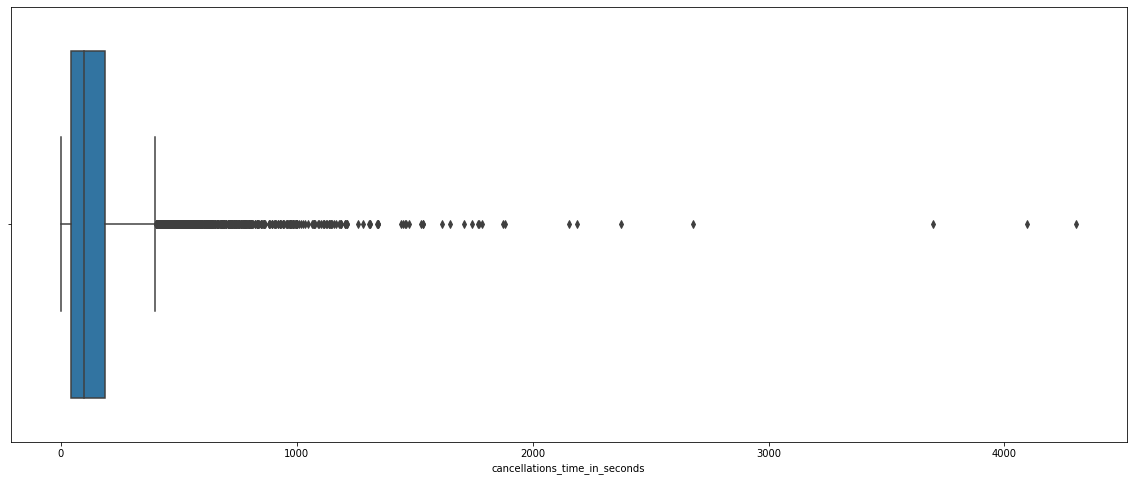

In [23]:
plt.figure(figsize=(20, 8))
sns.boxplot(df.cancellations_time_in_seconds)

Видим, есть ли выбросы?

In [24]:
df.order_status_key.unique() 

array([4])

In [26]:
df["cancellations_time_in_minutes"] = round(df.cancellations_time_in_seconds/60)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df.sort_values('cancellations_time_in_seconds', ascending=False)

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds,cancellations_time_in_minutes
8369,2020-07-22 13:21:20,3000589207012,4,1,4303.0,72.0
3442,2020-07-22 23:43:11,3000622541402,4,0,4097.0,68.0
8473,2020-07-22 06:48:55,3000577775717,4,1,3697.0,62.0
6825,2020-07-22 05:13:30,3000630305614,4,1,2680.0,45.0
9924,2020-07-22 18:30:46,3000618075800,4,1,2376.0,40.0
...,...,...,...,...,...,...
8715,2020-07-22 07:49:06,3000583441854,4,0,4.0,0.0
5361,2020-07-22 21:44:49,3000583791400,4,0,3.0,0.0
627,2020-07-22 13:39:40,3000584891213,4,0,3.0,0.0
9566,2020-07-22 10:58:43,3000556096297,4,0,3.0,0.0


In [28]:
df.query('is_courier_assigned_key == "1"')\
    .sort_values('cancellations_time_in_seconds', ascending=False)\
    .head(50)

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds,cancellations_time_in_minutes
8369,2020-07-22 13:21:20,3000589207012,4,1,4303.0,72.0
8473,2020-07-22 06:48:55,3000577775717,4,1,3697.0,62.0
6825,2020-07-22 05:13:30,3000630305614,4,1,2680.0,45.0
9924,2020-07-22 18:30:46,3000618075800,4,1,2376.0,40.0
3956,2020-07-22 14:23:54,3000557285679,4,1,2190.0,36.0
5790,2020-07-22 18:11:02,3000627382683,4,1,2155.0,36.0
3443,2020-07-22 23:57:50,3000622541727,4,1,1885.0,31.0
3505,2020-07-22 01:17:29,3000558186529,4,1,1873.0,31.0
3480,2020-07-22 00:42:25,3000585816327,4,1,1785.0,30.0
10310,2020-07-22 12:35:39,3000555496022,4,1,1774.0,30.0


In [29]:
df.query('is_courier_assigned_key == "0"')\
    .sort_values('cancellations_time_in_seconds', ascending=False)\
    .head(50)

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds,cancellations_time_in_minutes
3442,2020-07-22 23:43:11,3000622541402,4,0,4097.0,68.0
7025,2020-07-22 16:14:29,3000628632142,4,0,1614.0,27.0
3478,2020-07-22 20:15:24,3000628732423,4,0,1464.0,24.0
3466,2020-07-22 06:59:42,3000587755887,4,0,1179.0,20.0
3631,2020-07-22 22:44:42,3000630756128,4,0,1072.0,18.0
7424,2020-07-22 16:28:50,3000586241562,4,0,1035.0,17.0
10240,2020-07-22 23:07:40,3000590756619,4,0,999.0,17.0
3394,2020-07-22 15:36:08,3000578651191,4,0,930.0,16.0
2503,2020-07-22 18:41:41,3000590006063,4,0,909.0,15.0
6939,2020-07-22 17:53:35,3000628681794,4,0,862.0,14.0


**1.** Для всех ли заказов нашлись офферы курьерам?

In [30]:
df = df_orders.merge(df_offers, how='left', on='order_gk') #объединяем датафреймы


In [31]:
df_orders.nunique() 

order_datetime                    9921
order_gk                         10716
order_status_key                     2
is_courier_assigned_key              2
cancellations_time_in_seconds      772
dtype: int64

In [32]:
df_orders.shape

(10716, 5)

In [33]:
df.nunique()

order_datetime                    9921
order_gk                         10716
order_status_key                     2
is_courier_assigned_key              2
cancellations_time_in_seconds      772
offer_id                         31268
dtype: int64

In [34]:
df.shape

(34374, 6)

In [35]:
df.query('is_courier_assigned_key == "1" and offer_id == "NaN"')\
    .sort_values('cancellations_time_in_seconds', ascending = False)

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds,offer_id
22229,2020-07-22 05:13:30,3000630305614,4,1,2680.0,NaN
18601,2020-07-22 18:11:02,3000627382683,4,1,2155.0,NaN
33179,2020-07-22 12:35:39,3000555496022,4,1,1774.0,NaN
32755,2020-07-22 23:19:40,3000590757399,4,1,1744.0,NaN
1927,2020-07-22 08:45:43,3000584765892,4,1,1710.0,NaN
...,...,...,...,...,...,...
17662,2020-07-22 17:38:36,3000551281189,4,1,20.0,NaN
17637,2020-07-22 17:21:28,3000551256671,4,1,20.0,NaN
4374,2020-07-22 19:28:16,3000550681041,4,1,17.0,NaN
11284,2020-07-22 13:02:06,3000550506352,4,1,15.0,NaN


Продолжим отвечать на вопрос "Для всех ли заказов нашлись офферы курьерам?", исключив записи где is_courier_assigned_key == 1

In [36]:
df.query('is_courier_assigned_key != "1" and offer_id == "NaN"')

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds,offer_id
13,2020-07-22 21:24:45,3000583140877,9,0,NaN,NaN
29,2020-07-22 07:53:46,3000582791562,9,0,NaN,NaN
53,2020-07-22 00:04:16,3000582541301,9,0,NaN,NaN
69,2020-07-22 08:49:02,3000582817399,9,0,NaN,NaN
86,2020-07-22 14:08:23,3000632271478,4,0,117.0,NaN
...,...,...,...,...,...,...
34363,2020-07-22 13:18:03,3000599187042,4,0,10.0,NaN
34364,2020-07-22 13:14:50,3000599186984,4,0,19.0,NaN
34366,2020-07-22 12:45:23,3000597886178,4,0,23.0,NaN
34370,2020-07-22 13:13:55,3000599186962,4,0,4.0,NaN


**2.** Если нашлись такие заказы, на которых не назначены курьеры, то чего больше - отмен клиентом или реджектов системы?

In [37]:
df_orders.query('is_courier_assigned_key != "1" and order_status_key == "4"').shape[0] #Отмены клиентом

4496

In [38]:
df_orders.query('is_courier_assigned_key != "1" and order_status_key == "9"').shape[0] #Отмены системой

3406

**3.** Какова доля заказов с назначенным курьером среди заказов, отмененных системой?

In [39]:
df_orders.query("order_status_key == '9'").shape[0]

3409

In [40]:
df_orders.query("order_status_key == '9' and is_courier_assigned_key  == '1'").shape[0]

3

In [41]:
round((df_orders.query("order_status_key == '9' and is_courier_assigned_key  == '1'").shape[0]\
    /df_orders.query("order_status_key == '9'").shape[0])*100, 2)

0.09

**4**. Получите среднее времени до отмены (cancellations_time_in_seconds) с назначенным курьером и без, по часам.  Можно ли сделать выводы по полученной таблице?
Если необходимо - постройте график

In [42]:
df_orders['hour'] = df_orders.order_datetime.dt.hour

In [43]:
mean_no_courier = df_orders.query('is_courier_assigned_key == "0"')\
    .groupby('hour', as_index=False)\
    .agg({'cancellations_time_in_seconds': 'mean'})\
    .rename(columns={"cancellations_time_in_seconds": "no_courier"})

In [44]:
mean_yes_courier = df_orders.query('is_courier_assigned_key == "1"')\
    .groupby('hour', as_index=False)\
    .agg({'cancellations_time_in_seconds': 'mean'})\
    .rename(columns={"cancellations_time_in_seconds": "yes_courier"})

In [45]:
mean_time = mean_no_courier.merge(mean_yes_courier, how='left', on='hour')
mean_time = mean_time.set_index('hour')


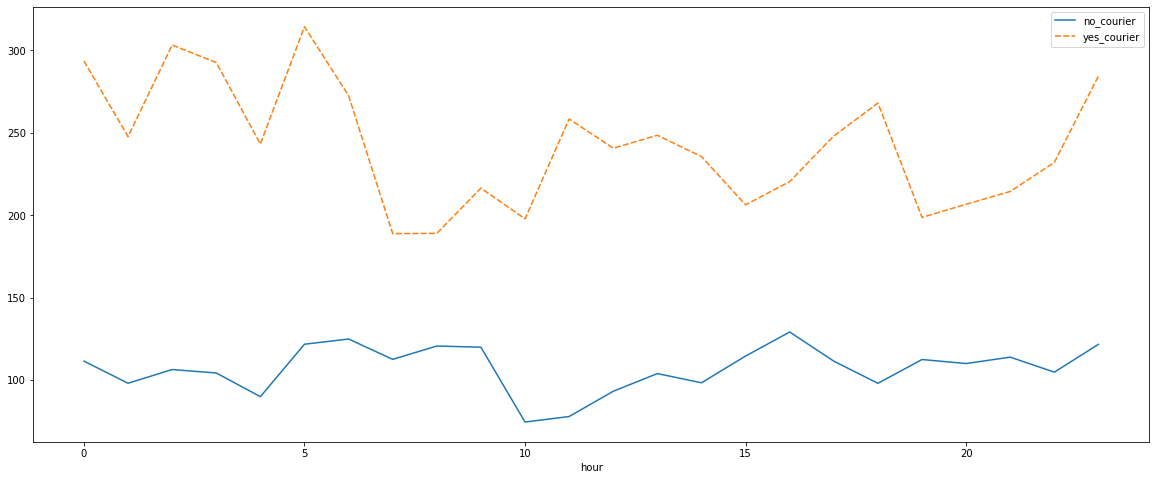

In [46]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=mean_time)

In [47]:
mean_no_courier.set_index('hour', inplace=True)
mean_yes_courier.set_index('hour', inplace=True)

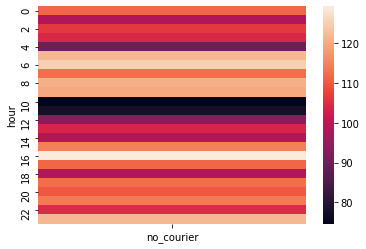

In [48]:
sns.heatmap(mean_no_courier)


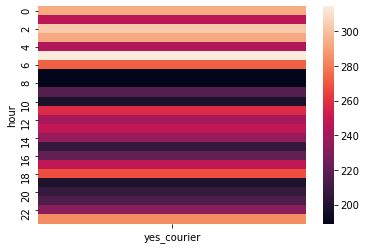

In [49]:
sns.heatmap(mean_yes_courier)

**5.** Постройте график распределения фейлов по часам - наблюдается ли тендеция, что в какие то часы доля той или иной категории аномально высока?

In [50]:
count_no_courier = df_orders.query('is_courier_assigned_key == "0" and cancellations_time_in_seconds == "NaN"')\
    .groupby('hour', as_index=False)\
    .agg({'order_status_key': 'count'})\
    .rename(columns={"order_status_key": "no_courier"})

In [51]:
count_yes_courier = df_orders.query('is_courier_assigned_key == "1" and cancellations_time_in_seconds == "NaN"')\
    .groupby('hour', as_index=False)\
    .agg({'order_status_key': 'count'})\
    .rename(columns={"order_status_key": "yes_courier"})

In [52]:
count_fail = count_no_courier.merge(count_yes_courier, how='left', on='hour')
count_fail = count_fail.set_index('hour')

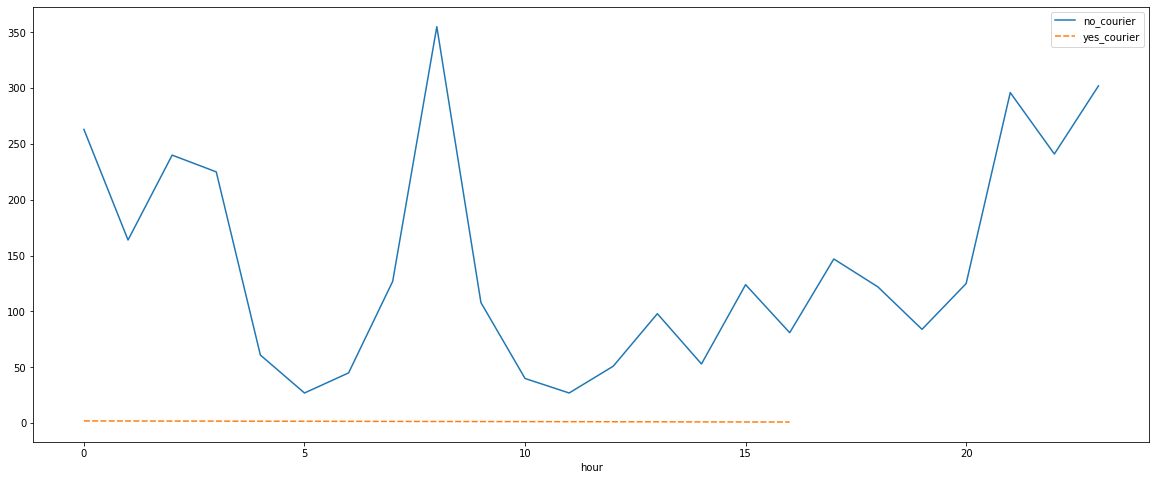

In [53]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=count_fail)

In [54]:
order_count = df_orders.groupby('hour', as_index=False)\
    .agg({'order_gk': 'count'})\
    .rename(columns={"order_gk": "count_orders"})

In [55]:
df = count_fail.merge(order_count, how='left', on='hour')
df = df.set_index('hour')

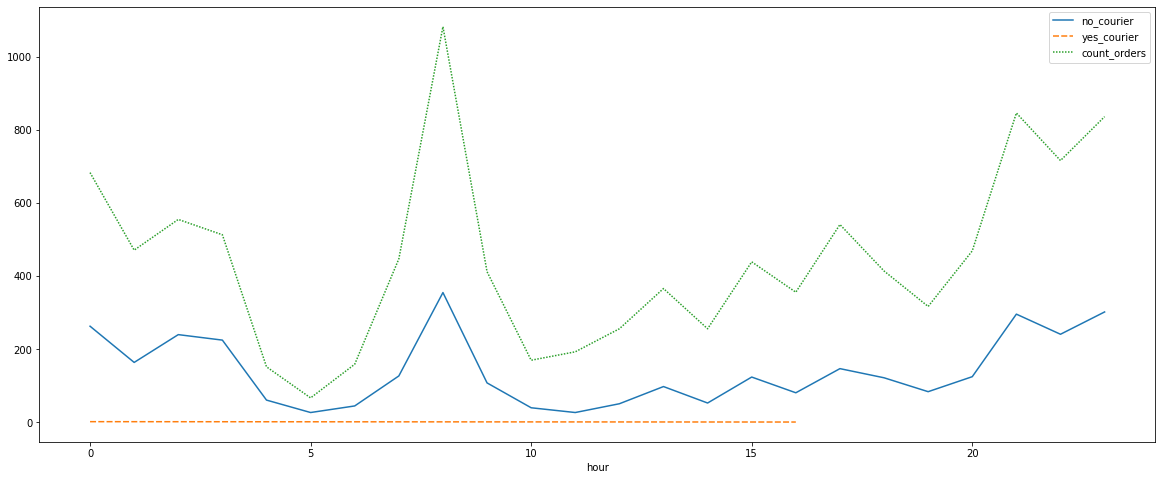

In [56]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df)

In [57]:
df1 = df.no_courier/df.count_orders*100

In [58]:
df1.describe()

count    24.000000
mean     30.294910
std       7.681266
min      13.989637
25%      26.427215
50%      28.356760
75%      35.272235
max      43.859649
dtype: float64

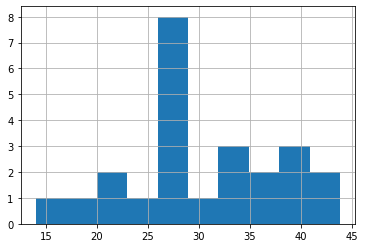

In [59]:
df1.hist()

# Выводы:

В ходе работы с данными были выдвинуты следующие гипотезы:

### Рекомендации по полученным выводам:

##### В первую очередь предлагаю проверить возможное наличие технических проблем.

##### После взглянуть  на рекомендации по улучшению производственного процесса: